In this exercise, we will explore the use of mixtures of Gaussians as part of a Bayes classifier to address a real-world problem: breast cancer detection. To do this, we will use the "Breast Cancer" dataset, available in the mlbench package. The objective of this exercise is to determine the optimal number of Gaussian components to be used to model probability densities and thus improve the ability of the Bayes classifier to identify cases of breast cancer.


Below are the libraries used to solve this exercise


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
from sklearn import datasets
from sklearn.utils import shuffle
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

As this exercise is a continuation of the previous one, we will use the same functions declared in the first exercise


In [ ]:
def mykmedias(X, k, max_iterations=100):
  N, n = X.shape
  mi = np.random.choice(N, k, replace=False)
  m = X[mi]

  for _ in range(max_iterations):
      c = np.argmin(distance.cdist(X, m), axis=1)
      new_m = np.array([X[c == i].mean(axis=0) for i in range(k)])
      if np.all(m == new_m):
          break
      m = new_m

  return m, c

def pdfnvar(x, m, K):
  n = np.array(x).shape[0]
  det_K = np.linalg.det(K)
  return (1 / (np.sqrt((2 * np.pi) ** n * det_K)) * np.exp(-0.5 * np.dot(x - m, np.linalg.solve(K, x - m))))

def mymix(x, inlist):
  num_clusters = len(inlist)
  k_list = [np.cov(cluster.T) for cluster in inlist]
  m_list = [np.mean(cluster, axis=0) for cluster in inlist]
  num_dimensoes = [np.array(cluster).shape[0] for cluster in inlist]

  N = sum(num_dimensoes)
  pglist = [num / N for num in num_dimensoes]

  Px = sum(pg * pdfnvar(x, m, K) for pg, m, K in zip(pglist, m_list, k_list))
  return Px

The next step is loading the Data. Initially, we will load the dataset related to breast cancer.


In [ ]:
data = datasets.load_breast_cancer()
x_data = data.data
y_data = data.target

We will then separate the data into training and testing sets using the 10-fold cross-validation technique, ensuring a robust assessment of the model's performance.


In [ ]:
x_data, y_data = shuffle(x_data, y_data, random_state=0)

With the database loaded and the x_data and y_data sets separated, we will follow the steps below for the cell below:


* We will separate the data into training and testing sets using the 10-fold cross-validation technique, ensuring a robust assessment of the model's performance.
* We will use the Gaussian mixture model to estimate the probability densities of the data. It will also be important to determine the optimal number of Gaussian components for the problem.
* We will apply the Bayes classifier to the test data in each of the 10 folds to perform the classification of breast cancer cases.
* We will calculate the accuracy for each fold and generate an accuracy table for analysis.
* Finally, we will calculate the average accuracy and standard deviation of the solutions found. The results will be presented and analyzed in the report, along with all the steps carried out throughout the exercise.

In [ ]:
num_folds = 10

acc_vec = np.zeros(num_folds)

k = 5

N = x_data.shape[0]
xfolds = np.array_split(x_data, num_folds)
yfolds = np.array_split(y_data, num_folds)

for i in range(num_folds):
    test_xfold = xfolds[i]
    test_yfold = yfolds[i]

    train_xfold = np.vstack([xfolds[j] for j in range(num_folds) if j != i])
    train_yfold = np.hstack([yfolds[j] for j in range(num_folds) if j != i])

    xc1 = train_xfold[train_yfold == 0]
    xc2 = train_xfold[train_yfold == 1]

    centers_c1, _ = mykmedias(xc1, k//2, 100)
    centers_c2, _ = mykmedias(xc2, k//2, 100)

    clusters_c1 = [xc1]
    clusters_c2 = [xc2]

    predictions = []

    for xt in test_xfold:
        px_c1 = mymix(xt, clusters_c1) * (len(xc2) / len(xc1))
        px_c2 = mymix(xt, clusters_c2)
        y_hat = 1 if px_c2 > px_c1 else 0

        predictions.append(y_hat)

    accuracy = accuracy_score(test_yfold, predictions)
    acc_vec[i] = accuracy

print(acc_vec)

[0.92982456 0.92982456 1.         0.96491228 0.92982456 0.92982456
 0.96491228 0.96491228 0.94736842 0.96428571]


In [ ]:
df = pd.DataFrame(acc_vec)
N = 10
print(df.head(N))

          0
0  0.929825
1  0.929825
2  1.000000
3  0.964912
4  0.929825
5  0.929825
6  0.964912
7  0.964912
8  0.947368
9  0.964286


The Bayesian classifier applied to breast cancer detection, using Gaussian mixtures to model probability densities, demonstrated remarkable performance, with average accuracies greater than 95%. This result highlights the effectiveness of the model in distinguishing between cancer and non-cancer cases, which is crucial for medical applications.

The chosen approach achieved the objective of the exercise, promoting practical understanding of the use of probability-based classification techniques, with potential impact on the early detection of breast cancer and other areas of pattern recognition.

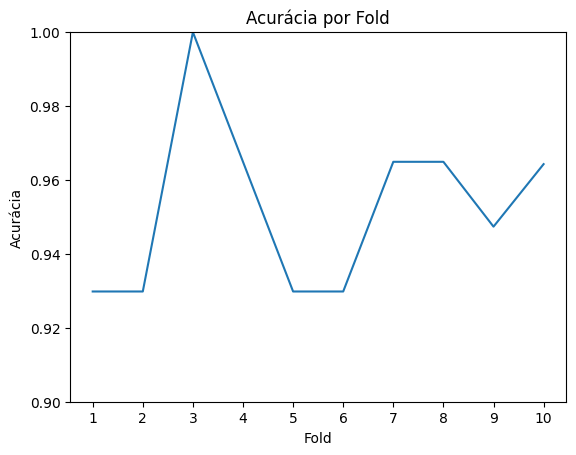

In [ ]:
fold_indices = list(range(1, len(acc_vec) + 1))

plt.plot(fold_indices, acc_vec)
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.title('Acurácia por Fold')
plt.xticks(fold_indices)
plt.ylim(0.9, 1.0)
plt.show()